In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy import random 

In [14]:
img = cv2.imread('original.jpeg',-1)

(-0.5, 1871.5, 1229.5, -0.5)

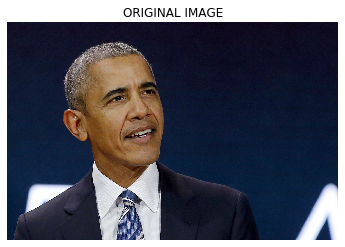

In [16]:
#cv2.imshow("image",img) #to display an image 
#cv2.waitKey(0)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("ORIGINAL IMAGE")
plt.axis("off")

In [17]:
dimensions = img.shape
rows = dimensions[0]
columns = dimensions[1]

In [18]:
pixels = rows *columns
print ("Total pixels are :",pixels)
select_pixels = int(0.03*pixels)
print ("Selected pixels are :",select_pixels)

Total pixels are : 2302560
Selected pixels are : 69076


In [19]:
img_noised = img.copy() #copying to noise an image
i = 0
while (i < select_pixels):
    rand = random.randint(256, size=(3))
    r = random.randint(rows)
    c= random.randint(columns)
    img_noised[r,c,0] = rand[0]
    img_noised[r,c,1] = rand[1]
    img_noised[r,c,2] = rand[2]
    i+=1

(-0.5, 1871.5, 1229.5, -0.5)

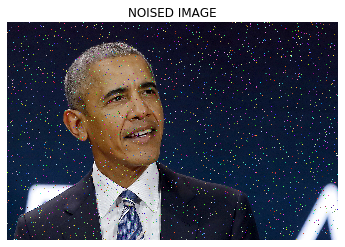

In [21]:
#cv2.imshow("image",img_noised)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(img_noised, cv2.COLOR_BGR2RGB))
plt.title("NOISED IMAGE")
plt.axis("off")

In [22]:
cv2.imwrite("noised.jpg",img_noised) #saving the noised image

True

In [23]:
#DENOISING USING MEAN

img_mean = cv2.imread("noised.jpg",-1 ) 

In [24]:
 for i in range (1,rows-1):       #accessing a particular pixel and its neighbouring pixels
    for j in range (1,columns-1):
        r=g=b=k=0
        for k in range(0,3) :
            arr = np.array([img_mean[i-1,j-1,k],
                          img_mean[i,j-1,k],
                          img_mean[i+1,j-1,k],
                          img_mean[i-1,j,k],
                          img_mean[i-1,j+1][k],
                          img_mean[i,j+1,k],
                          img_mean[i+1,j+1,k],
                          img_mean[i+1,j,k]
                         ])
            average = int(np.mean(arr))
            if k==0 : 
                b = average
            if k==1 :
                g = average
            if k==2 :
                r = average
                
        if img_mean[i,j,0]-b>20 or img_mean[i,j,1]-g>20 or img_mean[i,j,2]-r>20 :
            img_mean[i,j,0] = b
            img_mean[i,j,1] = g
            img_mean[i,j,2] = r

(-0.5, 1871.5, 1229.5, -0.5)

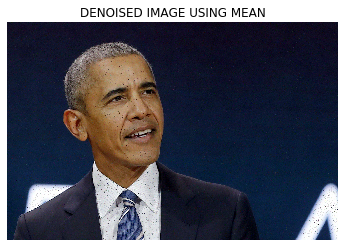

In [28]:
#cv2.imshow("image",img_mean)
#cv2.waitKey(0) 

plt.imshow(cv2.cvtColor(img_mean, cv2.COLOR_BGR2RGB))
plt.title("DENOISED IMAGE USING MEAN")
plt.axis("off")

In [12]:
cv2.imwrite("denoised-mean.jpg",img_mean) #saving the noised image

True

In [26]:
#DENOISING USING MEDIAN
img_median = cv2.imread("noised.jpg",-1)

In [27]:
for i in range (1,rows-1):       #accessing a particular pixel and its neighbouring pixels
    for j in range (1,columns-1):
        r=g=b=k=0
        for k in range(0,3) :
            arr = np.array([img_median[i-1,j-1,k],
                          img_median[i,j-1,k],
                          img_median[i+1,j-1,k],
                          img_median[i-1,j,k],
                          img_median[i-1,j+1][k],
                          img_median[i,j+1,k],
                          img_median[i+1,j+1,k],
                          img_median[i+1,j,k]
                         ])
            average = int(np.median(arr))
            if k==0 : 
                b = average
            if k==1 :
                g = average
            if k==2 :
                r = average
                
        if img_median[i,j,0]-b>20 or img_median[i,j,1]-g>20 or img_median[i,j,2]-r>20 :
            img_median[i,j,0] = b
            img_median[i,j,1] = g
            img_median[i,j,2] = r

(-0.5, 1871.5, 1229.5, -0.5)

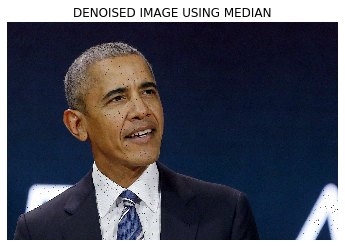

In [29]:
#cv2.imshow("image",img_median)
#cv2.waitKey(0)

plt.imshow(cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
plt.title("DENOISED IMAGE USING MEDIAN")
plt.axis("off")

In [30]:
cv2.imwrite("denoised-median.jpg",img_median) #saving the noised image

True